# SIR fit Curve - Dynamic Dashboard

* Dynamic dashoard for fit curve
* SIR curve of various countries

In [1]:
import pandas as pd
import numpy as np
import dash
from dash import html
from dash import dcc
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objects as go
from scipy import optimize, integrate
from dash.dependencies import Input, Output,State

import seaborn as sns
sns.set(style="darkgrid")

plt.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [2]:
world_data = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
world_data_1 = pd.read_csv(world_data)
world_data_1.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22,7/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183908,184038,184224,184360,184473,184587,184819,185086,185272,185393
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,298578,300058,301394,302767,303925,304890,305123,306789,308050,309278
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266542,266591,266654,266700,266772,266839,266916,267010,267096,267194
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45061,45061,45326,45326,45326,45326,45326,45326,45326,45508
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102209,102209,102209,102301,102301,102301,102301,102301,102301,102301


In [3]:
small_data = pd.read_csv(world_data)
small_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22,7/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183908,184038,184224,184360,184473,184587,184819,185086,185272,185393
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,298578,300058,301394,302767,303925,304890,305123,306789,308050,309278
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266542,266591,266654,266700,266772,266839,266916,267010,267096,267194
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45061,45061,45326,45326,45326,45326,45326,45326,45326,45508
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102209,102209,102209,102301,102301,102301,102301,102301,102301,102301


In [4]:
time_idx = small_data.columns[4:]

In [5]:
data = pd.DataFrame({'date':time_idx})  # Separation of date column
data.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
country_list = ['Germany', 'India', 'US','Australia']   # list of countries is defined

In [7]:
for each in country_list:
    data[each] =np.array(small_data[small_data['Country/Region']==each].iloc[:,4::].sum(axis=0)) 

In [8]:
data.head() # segrgation of data for 4 countries listed

,date,Germany,India,US,Australia
0,1/22/20,0,0,1,0
1,1/23/20,0,0,1,0
2,1/24/20,0,0,2,0
3,1/25/20,0,0,2,0
4,1/26/20,0,0,5,4


In [9]:
time_idx = [datetime.strptime(each, "%m/%d/%y") for each in data.date]  #to convert all the dates into datetime 
time_str= [each.strftime('%Y-%m-%d') for each in time_idx]     #to convert datetime function to string

In [10]:
N0=1000000  #max susceptible population
beta=0.4    # infection spread dynamics (recovery coefficient)
gamma=0.1   # recovery rate


# condition I0+S0+R0=N0
I0=data.Germany[70]
S0=N0-I0
R0=0

In [11]:
def SIR_model(SIR,beta,gamma):  # function of the SIR_model
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

In [12]:
np.array([S0,I0,R0]) 

array([932634,  67366,      0], dtype=int64)

In [13]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recovered':R0})


for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index= True)
    
# Appending S0, I0, R0 to the dataframe propagation_rates

C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3091742736.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3091742736.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3091742736.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3091742736.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

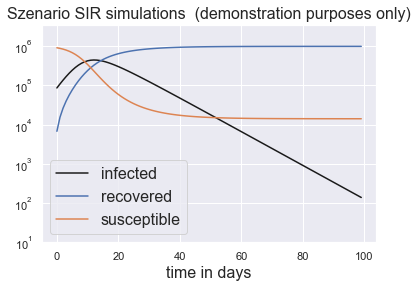

In [14]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 3500000)
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [15]:
ydata = np.array(data.Germany[75:]) # data from 75th row
t=np.arange(len(ydata))
len(t)

844

In [16]:
# re-initialization
I0=ydata[80]    
S0=N0-I0
R0=0

In [17]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [18]:
def fit_odeint(x, beta, gamma):    # helper function for the integration
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1]

In [19]:
# Curve for differential equation
popt=[0.5,0.2]   
fit_odeint(t, *popt)

array([ 1.92079000e+05,  2.30869711e+05,  2.66148247e+05,  2.94053282e+05,
        3.11885383e+05,  3.18700357e+05,  3.15231039e+05,  3.03335834e+05,
        2.85335334e+05,  2.63495585e+05,  2.39737543e+05,  2.15535309e+05,
        1.91930445e+05,  1.69600061e+05,  1.48939259e+05,  1.30137898e+05,
        1.13243975e+05,  9.82124126e+04,  8.49408743e+04,  7.32951108e+04,
        6.31263251e+04,  5.42826692e+04,  4.66165444e+04,  3.99889659e+04,
        3.42719150e+04,  2.93493493e+04,  2.51173391e+04,  2.14836578e+04,
        1.83670521e+04,  1.56963457e+04,  1.34094756e+04,  1.14525273e+04,
        9.77880726e+03,  8.34797741e+03,  7.12526245e+03,  6.08073444e+03,
        5.18867424e+03,  4.42700634e+03,  3.77680178e+03,  3.22184356e+03,
        2.74824806e+03,  2.34413653e+03,  1.99935079e+03,  1.70520778e+03,
        1.45428811e+03,  1.24025414e+03,  1.05769369e+03,  9.01985913e+02,
        7.69186407e+02,  6.55928694e+02,  5.59339961e+02,  4.76968954e+02,
        4.06724330e+02,  

In [20]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

standard deviation errors :  [0.07806607 0.01631528]  start infect: 95391
Optimal parameters: beta = 0.02220514571059167  and gamma =  0.010554826404787939


In [21]:
# To get the fitted curve
fitted=fit_odeint(t, *popt)

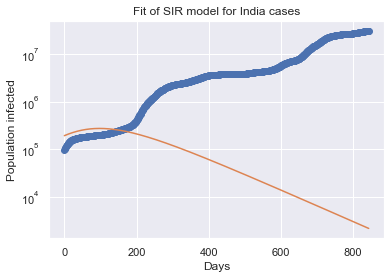

Optimal parameters: beta = 0.02220514571059167  and gamma =  0.010554826404787939
Basic Reproduction Number R0  2.1037907075874642
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible


In [22]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for India cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible")

In [23]:
# defintion of parameters
t_initial=100
t_intro_measures=24
t_hold=21
t_relax=21

beta_max=0.085
beta_min=0.04
gamma=0.02
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))

In [24]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recovered':R0})

In [25]:
for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

In [26]:
propagation_rates.tail()

,susceptible,infected,recovered
161,20720.886015,71465.326563,907813.787423
162,20605.011467,70151.894579,909243.093954
163,20488.650280,68865.217875,910646.131846
164,20371.893723,67604.670074,912023.436203
165,20254.828735,66369.641660,913375.529604


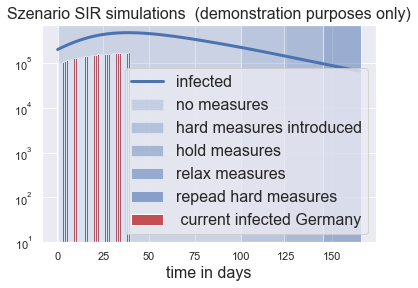

In [27]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata[0:40])),ydata[0:40],width = 0.8,label=' current infected Germany',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 1.5*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [28]:
time_idx = world_data_1.columns[4:]
sir_plot = pd.DataFrame({'date':time_idx})
sir_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [29]:
country_list = world_data_1['Country/Region'].unique()

In [30]:
for each in country_list:
    sir_plot[each] =np.array(world_data_1[world_data_1['Country/Region']==each].iloc[:,4::].sum(axis=0))

C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\273299791.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] =np.array(world_data_1[world_data_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\273299791.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] =np.array(world_data_1[world_data_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\273299791.py:2: PerformanceWarning

In [31]:
sir_plot.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [32]:
sir_plot= sir_plot.drop(columns = ['Taiwan*', 'South Sudan', 'Guyana','Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland',
                                   'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Korea, South', 'Kosovo','Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Luxembourg', 'MS Zaandam', 'Madagascar', 'Malawi',
       'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius',
       'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco',
       'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Niger', 'Panama', 'Papua New Guinea', 'Paraguay',
       'Peru', 'Philippines'])

In [33]:
time_idx = [datetime.strptime(each, "%m/%d/%y") for each in sir_plot.date] #to convert all the dates into datetime 
time_str= [each.strftime('%Y-%m-%d') for each in time_idx] #to convert datetime function to string

In [34]:
sir_plot.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [35]:
df_input = sir_plot.iloc[80:]

In [36]:
df_all = df_input.columns
df_all = list(df_all)

In [37]:
def SIR_model(SIR,beta,gamma):
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

def SIR_model_t(SIR,t,beta,gamma):
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

#Function defined for optimize curve fit

def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI


In [38]:
for each in df_all[1:]:
    ydata = np.array(df_input[each])
    t = np.arange(len(ydata))
    N0 = 6000000
    
    I0 = ydata[1]
    S0 = N0 - I0
    R0 = 0
    
    popt, pcov = optimize.curve_fit(fit_odeint, t, ydata, maxfev= 40000000)
    perr = np.sqrt(np.diag(pcov))
    
    fitted=fit_odeint(t, *popt).reshape(-1,1)
    df_input[each +'_fitted'] = fitted
    

df_input

C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\711971771.py:10: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\711971771.py:11: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\711971771.py:11: RuntimeWarning: invalid value encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: SettingWithCopyWarning: 
A val

C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\pinak savaliya\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[each +'_fitted'] = fitted
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\pinak savaliya\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covari

C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[each +'_fitted'] = fitted
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor 

C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[each +'_fitted'] = fitted
C:\Users\pinak savaliya\AppData\Local\Temp\ipykernel_8320\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted


,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay_fitted,Uzbekistan_fitted,Vanuatu_fitted,Venezuela_fitted,Vietnam_fitted,West Bank and Gaza_fitted,Winter Olympics 2022_fitted,Yemen_fitted,Zambia_fitted,Zimbabwe_fitted
80,4/11/20,521,433,1825,601,19,0,21,1975,967,...,480.000000,865.000000,0.0,181.000000,262.000000,271.000000,0.0,1.000000,43.000000,14.000000
81,4/12/20,555,446,1914,638,19,0,21,2142,1013,...,483.875844,874.056889,0.0,186.216819,263.130428,274.683920,0.0,1.015950,43.454963,14.135718
82,4/13/20,607,467,1983,646,19,0,23,2208,1039,...,487.746425,883.208427,0.0,191.579424,264.254098,278.417907,0.0,1.032154,43.914420,14.272719
83,4/14/20,665,475,2070,659,19,0,23,2277,1067,...,491.610829,892.455602,0.0,197.091619,265.370831,282.202640,0.0,1.048617,44.378407,14.411017
84,4/15/20,770,494,2160,673,19,0,23,2443,1111,...,495.468126,901.799407,0.0,202.757289,266.480451,286.038810,0.0,1.065343,44.846963,14.550623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,7/24/22,184587,304890,266839,45326,102301,11,8736,9507562,424400,...,0.052984,179848.173254,0.0,0.000040,0.592951,486799.014701,0.0,5711.376046,4.492287,28.825966
915,7/25/22,184819,305123,266916,45326,102301,11,8736,9507562,425365,...,0.052221,178974.347589,0.0,0.000038,0.586905,484131.720006,0.0,5643.900309,4.442947,28.557760
916,7/26/22,185086,306789,267010,45326,102301,11,8741,9507562,425365,...,0.051470,178100.410220,0.0,0.000037,0.580920,481465.953181,0.0,5576.981239,4.394146,28.291927
917,7/27/22,185272,308050,267096,45326,102301,11,8741,9507562,425365,...,0.050729,177226.430309,0.0,0.000036,0.574996,478801.953364,0.0,5510.620843,4.345877,28.028447


In [ ]:
app = dash.Dash(__name__)
# Define the app
fig = go.Figure()

app.layout = html.Div([
    html.H1("SIR Model"),
    html.H4("Please select anyone country"),
    
    dcc.Dropdown(id='country_dropdown_sir',
                options=[ {'label': each,'value':each} for each in df_all[1:]],
                value='India', # which are pre-selected
                multi= False),
    
    dcc.Graph(id = "SIR_model"
    )
])

@app.callback(
    Output('SIR_model', 'figure'),
    [Input('country_dropdown_sir', 'value')])

def SIR_fig(con_input):
    df= df_input
    
    for i in df[1:]:
        data = []
        trace = go.Scatter(x=df.date,
                        y=df[con_input],
                        mode='lines+markers',
                        name = con_input)
        data.append(trace)
        
        trace_fitted = go.Scatter(x=df.date,
                        y=df[con_input +'_fitted'], 
                        mode='lines+markers',
                        name=con_input+'_fitted')
        data.append(trace_fitted)
        
        
            
    return {'data': data,
            'layout' : dict(
                width=1280,
                height=720,
                title= 'SIR model',
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
                
            )
        }

if __name__ == '__main__':
    app.run_server(port=4050)

Dash is running on http://127.0.0.1:4050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:4050 (Press CTRL+C to quit)
127.0.0.1 - - [29/Jul/2022 16:13:09] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Jul/2022 16:13:09] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [29/Jul/2022 16:13:09] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [29/Jul/2022 16:13:09] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [29/Jul/2022 16:13:09] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [29/Jul/2022 16:13:09] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [29/Jul/2022 16:13:10] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Jul/2022 16:13:25] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\pinak savaliya\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: None

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\pinak savaliya\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\pinak savaliya\AppData\Loca

127.0.0.1 - - [29/Jul/2022 16:13:38] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [29/Jul/2022 16:13:45] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\pinak savaliya\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: None

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\pinak savaliya\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\pinak savaliya\AppData\Loca

127.0.0.1 - - [29/Jul/2022 16:13:48] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [29/Jul/2022 16:13:56] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Jul/2022 16:13:59] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Jul/2022 16:14:03] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Jul/2022 16:14:27] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Jul/2022 16:14:32] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Jul/2022 16:14:51] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Jul/2022 16:15:13] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Jul/2022 16:15:19] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Jul/2022 16:15:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Jul/2022 16:15:34] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [29/Jul/2022 16:15:34] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [29/Jul/2022 16:15:35] "GET /

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\pinak savaliya\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: None

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\pinak savaliya\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\pinak savaliya\AppData\Loca

127.0.0.1 - - [29/Jul/2022 16:15:50] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [29/Jul/2022 16:16:26] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\pinak savaliya\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: None

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\pinak savaliya\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\pinak savaliya\AppData\Loca

127.0.0.1 - - [29/Jul/2022 16:17:51] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [29/Jul/2022 16:17:58] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Jul/2022 16:18:25] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Jul/2022 16:18:33] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Jul/2022 16:18:39] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\pinak savaliya\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: None

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\pinak savaliya\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\pinak savaliya\AppData\Loca

127.0.0.1 - - [29/Jul/2022 16:52:52] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [29/Jul/2022 16:53:02] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Jul/2022 16:55:41] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\pinak savaliya\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: None

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\pinak savaliya\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\pinak savaliya\AppData\Loca

127.0.0.1 - - [29/Jul/2022 16:55:47] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [29/Jul/2022 16:55:50] "POST /_dash-update-component HTTP/1.1" 200 -
